# Подход 2: логистическая регрессия

In [4]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
%matplotlib inline

In [6]:
def get_clean_data(cleaner_name='clean'):
    path = './clean/' + cleaner_name
    X_train = pandas.read_csv(path + '/X_train.csv', index_col='match_id')
    y_train = pandas.read_csv(path + '/y_train.csv', index_col='match_id')
    X_test = pandas.read_csv(path + '/X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [7]:
X, y, X_kaggle = get_clean_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
def plot_C_scores(C_pow_range, scores):
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C):
    print('C =', str(C))
    model = LogisticRegression(solver='lbfgs', C=C, random_state=42, n_jobs=None)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=None)
    
def test_model(X, y):
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]

    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C)
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)       
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores)
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    print("Max score:", C_range[max_score_index], max_score)
    
    min_score = min(scores)
    min_score_index = scores.index(min_score)
    print("Min score:", C_range[min_score_index], min_score)

C = 1e-05
[0.69715107 0.69880673 0.69951849 0.69930606 0.70107295]
Time elapsed: 0:00:30.635897
C = 0.0001
[0.72354915 0.72407156 0.72464733 0.72596995 0.72695107]
Time elapsed: 0:00:20.019749
C = 0.001
[0.74465064 0.74667682 0.74412646 0.74880412 0.74740582]
Time elapsed: 0:00:33.055583
C = 0.01
[0.7494746  0.75279048 0.74925052 0.75539226 0.75178552]
Time elapsed: 0:01:01.301232
C = 0.1


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74943853 0.75315358 0.74950305 0.75597807 0.75165638]
Time elapsed: 0:03:13.740210
C = 1.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74937371 0.75316413 0.74949465 0.75601666 0.75158665]
Time elapsed: 0:04:34.044443
C = 10.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936566 0.75316877 0.74949792 0.75601767 0.75157764]
Time elapsed: 0:06:33.421629
C = 100.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936181 0.7531664  0.74949675 0.75601692 0.75157372]
Time elapsed: 0:06:21.594860
C = 1000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935759 0.7531667  0.74949577 0.75601455 0.75157612]
Time elapsed: 0:06:32.237578
C = 10000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936141 0.75316726 0.74949736 0.75601695 0.75157275]
Time elapsed: 0:08:39.571047
C = 100000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935907 0.7531674  0.74949715 0.75601525 0.75157281]
Time elapsed: 0:05:38.027989


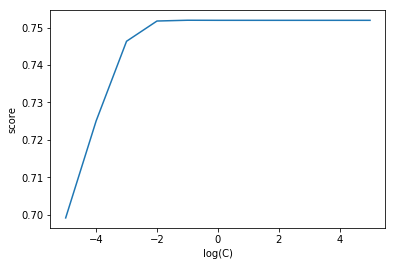

Max score: 0.1 0.751945922900405
Max score: 1e-05 0.699171062061466


In [37]:
test_model(X, y)

##### Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем можно объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Это лучше градиентного бустинга по 50 деревьям. Логистическая регрессия работает быстрее по сравнению с градиентным бустингом.

# Удаление категориальных признаков

In [38]:
X, y, X_kaggle = get_clean_data('clean_category')
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C = 1e-05
[0.6929998  0.69476009 0.69560968 0.69507898 0.69701177]
Time elapsed: 0:00:34.686746
C = 0.0001
[0.70934892 0.71041905 0.71167711 0.71168669 0.71353197]
Time elapsed: 0:00:48.971890
C = 0.001
[0.71434549 0.71581481 0.71629762 0.71688793 0.7185335 ]
Time elapsed: 0:01:13.452466
C = 0.01
[0.7145036  0.71621974 0.71627984 0.71725108 0.71854174]
Time elapsed: 0:01:59.041820
C = 0.1
[0.71448111 0.71620877 0.71622672 0.71726946 0.71848302]
Time elapsed: 0:02:05.469039
C = 1.0
[0.71447746 0.71620674 0.71621937 0.71727383 0.71847432]
Time elapsed: 0:02:07.272870
C = 10.0
[0.71447697 0.71620771 0.71621935 0.71727417 0.71847447]
Time elapsed: 0:02:09.292381
C = 100.0
[0.71447697 0.71620728 0.71621932 0.71727431 0.71847421]
Time elapsed: 0:01:52.005824
C = 1000.0
[0.714477   0.71620729 0.71621932 0.7172743  0.7184742 ]
Time elapsed: 0:01:36.302923
C = 10000.0
[0.71447702 0.71620728 0.71621932 0.71727431 0.7184742 ]
Time elapsed: 0:01:35.576801
C = 100000.0
[0.71447702 0.71620728 0.7162

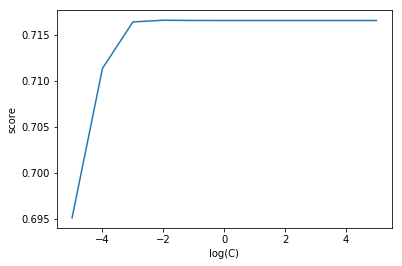

Max score: 0.01 0.7165592000076536
Max score: 1e-05 0.695092064575022


In [39]:
test_model(X, y)

##### Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC-ROC достигается при C = 0.01 и равно 0.71. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

In [35]:
heroes = pandas.read_csv('./dictionaries/heroes.csv')
print('Героев в игре:', len(heroes))

Героев в игре: 112


##### Сколько различных идентификаторов героев существует в данной игре?

В данной игре существует 112 идентификаторов героев

# "Мешок слов" для кодирования информации о героях.

In [41]:
X, y, X_kaggle = get_clean_data('clean_category')
X_hero, _y, X_kaggle_hero = get_clean_data('hero_bag')

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_kaggle = pandas.DataFrame(scaler.transform(X_kaggle), index = X_kaggle.index)

X = pandas.concat([X, X_hero], axis=1)
X_kaggle = pandas.concat([X_kaggle, X_kaggle_hero], axis=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
e:\python\introduction_to_ml\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


C = 1e-05
[0.69715107 0.69880673 0.69951849 0.69930606 0.70107295]
Time elapsed: 0:00:11.751175
C = 0.0001
[0.72354915 0.72407156 0.72464733 0.72596995 0.72695107]
Time elapsed: 0:00:12.752842
C = 0.001
[0.74465064 0.74667682 0.74412646 0.74880412 0.74740582]
Time elapsed: 0:00:31.594070
C = 0.01
[0.7494746  0.75279048 0.74925052 0.75539226 0.75178552]
Time elapsed: 0:01:14.569061
C = 0.1


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74943853 0.75315358 0.74950305 0.75597807 0.75165638]
Time elapsed: 0:01:31.808350
C = 1.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74937371 0.75316413 0.74949465 0.75601666 0.75158665]
Time elapsed: 0:01:49.439574
C = 10.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936566 0.75316877 0.74949792 0.75601767 0.75157764]
Time elapsed: 0:01:35.652719
C = 100.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936181 0.7531664  0.74949675 0.75601692 0.75157372]
Time elapsed: 0:01:38.264437
C = 1000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935759 0.7531667  0.74949577 0.75601455 0.75157612]
Time elapsed: 0:01:11.642618
C = 10000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74936141 0.75316726 0.74949736 0.75601695 0.75157275]
Time elapsed: 0:01:35.222390
C = 100000.0


e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
e:\python\introduction_to_ml\venv\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 

[0.74935907 0.7531674  0.74949715 0.75601525 0.75157281]
Time elapsed: 0:01:26.975435


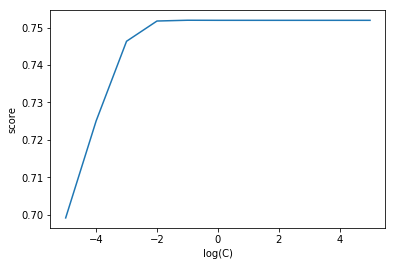

Max score: 0.1 0.751945922900405
Min score: 1e-05 0.699171062061466


In [42]:
test_model(X, y)

##### Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

После добавления "мешка слов" по героям качество улучшилось - наилучшее значение показателя AUC-ROC при C = 0.1 равно 0.75. Это происходит потому что вместо случайного шума или отсутствия данных о героях для построения предсказания у нас есть осмысленная разреженная матрица.

##### Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?

* Минимальное значение показателя AUC-ROC у лучшего алгоритма равно ~0.7 при C=0.00001
* Максимальное значение показателя AUC-ROC у лучшего алгоритма алгоритма равно ~0.75 при C=0.1